评估不同 fq 下，不同记忆规模的记忆保留效果（mask_ratio=0.30）...



BTSP 更新概率 fq:   0%|          | 0/4 [00:00<?, ?it/s]








Training Patterns: 100%|██████████| 8/8 [00:01<00:00,  5.02it/s]


Mask Ratios: 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]













Training Patterns: 100%|██████████| 12/12 [00:02<00:00,  5.15it/s]


Mask Ratios: 100%|██████████| 1/1 [00:01<00:00,  1.80s/it]

















Training Patterns: 100%|██████████| 16/16 [00:03<00:00,  5.16it/s]


Mask Ratios: 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]





















Training Patterns: 100%|██████████| 20/20 [00:03<00:00,  5.15it/s]


Mask Ratios: 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]
























Training Patterns: 100%|██████████| 24/24 [00:04<00:00,  4.98it/s]


Mask Ratios: 100%|██████████| 1/1 [00:03<00:00,  3.61s/it]




























Training Patterns: 100%|██████████| 28/28 [00:05<00:00,  5.11it/s]


Mask Ratios: 100%|██████████| 1/1 [00:04<00:00,  4.21s/it]
































Training Patterns: 100%|██████████| 32/

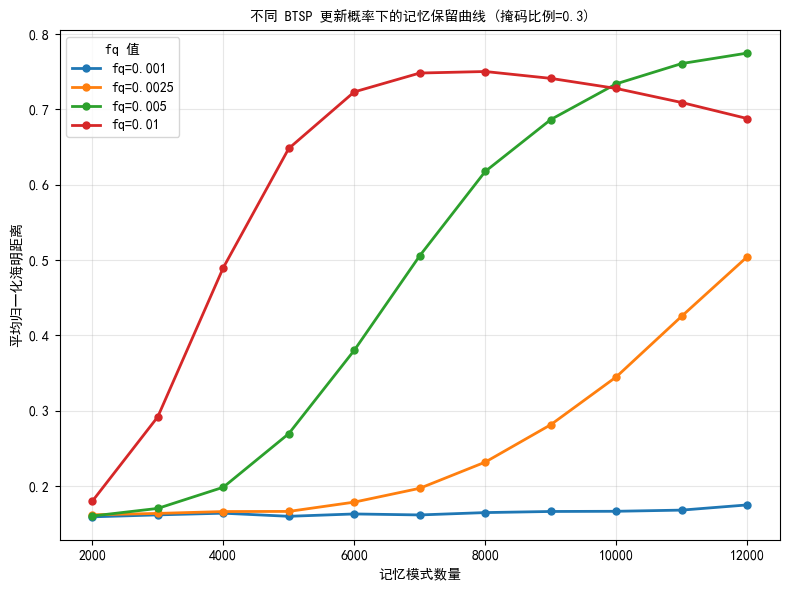


✅ 实验完成，结果已保存为 memory_retention_vs_size_mask0.3.npy


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from binary_btsp_network_torch import BinaryBTSPNetworkTorch
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


n_input = 10000       # CA3 
n_memory = 15000      # CA1
fp = 0.005            # 输入稀疏度
fw = 0.6              # 连接稀疏度
batch_size = 256
n_repeats = 10
device = "cuda" if torch.cuda.is_available() else "cpu"


fq_values = [0.001, 0.0025, 0.005, 0.01]   # BTSP 更新概率
mask_ratio = 0.3                            # 固定掩码比例
memory_sizes = np.arange(2000, 13000, 1000) # 记忆规模

# 结果矩阵：行=fq，列=记忆规模
results = np.zeros((len(fq_values), len(memory_sizes)))

print(f"评估不同 fq 下，不同记忆规模的记忆保留效果（mask_ratio={mask_ratio:.2f}）...\n")


for i, fq in enumerate(tqdm(fq_values, desc="BTSP 更新概率 fq")):
    for j, n_pat in enumerate(tqdm(memory_sizes, desc=f"fq={fq:.4f}", leave=False)):
        net = BinaryBTSPNetworkTorch(
            n_input=n_input,
            n_memory=n_memory,
            fq=fq,
            fp=fp,
            fw=fw,
            device=device,
            threshold=8
        )


        patterns = net.make_sparse_patterns(n_pat)
        net.train_patterns(patterns, batch_size=batch_size)

        # 计算记忆保留（只取一个掩码比例）
        mean_rel_diss = net.compute_relative_dissimilarity_vectorized(
            patterns=patterns,
            mask_ratios=[mask_ratio],
            n_repeats=n_repeats,
            batch_size=batch_size,
        )

        results[i, j] = mean_rel_diss[0]  # 只有一个掩码比例


plt.figure(figsize=(8, 6))
for i, fq in enumerate(fq_values):
    plt.plot(memory_sizes, results[i, :], '-o', lw=2, markersize=5, label=f"fq={fq}")

plt.xlabel("记忆模式数量", fontproperties="SimHei")
plt.ylabel("平均归一化海明距离", fontproperties="SimHei")
plt.title(f"不同 BTSP 更新概率下的记忆保留曲线 (掩码比例={mask_ratio:.1f})", fontproperties="SimHei")
plt.legend(title="fq 值")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


np.save(f"memory_retention_vs_size_mask{mask_ratio:.1f}.npy", results)
print(f"\n✅ 实验完成，结果已保存为 memory_retention_vs_size_mask{mask_ratio:.1f}.npy")


评估不同 fq 下，不同掩码比例的记忆保留效果...



BTSP 更新概率 fq: 100%|██████████| 4/4 [03:41<00:00, 55.43s/it]


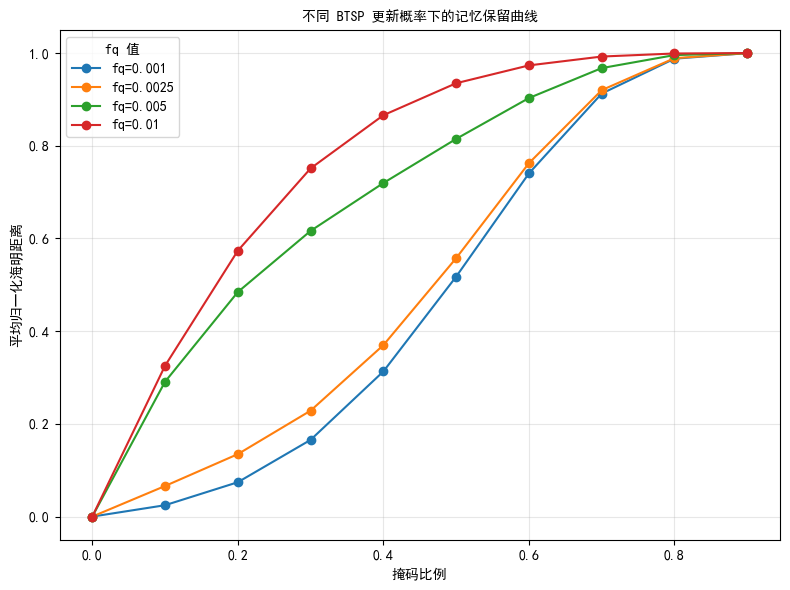


✅ 实验完成，结果已保存为 memory_retention_vs_fq.npy


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from binary_btsp_network_torch import BinaryBTSPNetworkTorch
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


n_input = 10000       # CA3 
n_memory = 15000      # CA1 
fp = 0.005            # 输入稀疏度
fw = 0.6              # 连接稀疏度
batch_size = 256
n_repeats = 10
device = "cuda" if torch.cuda.is_available() else "cpu"


fq_values = [0.0010, 0.0025, 0.005, 0.01]   
mask_ratios = np.linspace(0, 0.9, 10)
n_pat = 8000  

#  结果矩阵 
results = np.zeros((len(fq_values), len(mask_ratios)))

print("评估不同 fq 下，不同掩码比例的记忆保留效果...\n")

for i, fq in enumerate(tqdm(fq_values, desc="BTSP 更新概率 fq")):
    
    net = BinaryBTSPNetworkTorch(
        n_input=n_input,
        n_memory=n_memory,
        fq=fq,
        fp=fp,
        fw=fw,
        device=device,
        threshold=8
    )

    patterns = net.make_sparse_patterns(n_pat)
    net.train_patterns(patterns, batch_size=batch_size)

    # 计算不同掩码比例下的平均归一化海明距离
    mean_rel_diss = net.compute_relative_dissimilarity_vectorized(
        patterns=patterns,
        mask_ratios=mask_ratios,
        n_repeats=n_repeats,
        batch_size=batch_size,
    )

    results[i, :] = mean_rel_diss


plt.figure(figsize=(8, 6))
for i, fq in enumerate(fq_values):
    plt.plot(mask_ratios, results[i, :], marker='o', label=f"fq={fq}")

plt.xlabel("掩码比例", fontproperties="SimHei")
plt.ylabel("平均归一化海明距离", fontproperties="SimHei")
plt.title("不同 BTSP 更新概率下的记忆保留曲线", fontproperties="SimHei")
plt.legend(title="fq 值")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


np.save("memory_retention_vs_fq.npy", results)
#print("\n结果已保存为 memory_retention_vs_fq.npy")
